Neuroscience Data Analysis with Python Workshop – MiniProject #1

Hila Yogev - 211624143

1. Import libraries & file setup 

In [125]:
# --- Libraries ---
# Import all useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
# --- File Setup ---
#  A function for loading a CSV file and raise errors if needed
def load_data(file_path):
    
    try:
    # Read the CSV file directly into a DataFrame
        df = pd.read_csv(file_path)
        return df

    except FileNotFoundError:
    # Raise an exception if the path or file name is incorrect
        print(f"Path error: file not found in path - {file_path}")
        return None

    except Exception as e:
    # Raise an exception for any other issues (permissions, encoding, parsing, etc.)
        print("General file error: failed to load the CSV.")
        print(f"Details: {e}")
        return None


2. Main Program 

In [127]:
# --- Main Program ---
path = "laptop_price - dataset.csv"
# Load the dataset
df = load_data(path)

# Stop here if loading failed
if df is None:
    raise SystemExit("Stopping execution because the dataset could not be loaded.")

# Quick sanity checks after loading
display(df)
print(f"Dataset shape: {df.shape}")
df.info() 


,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel,Core i7 6500U,2.5,4,128GB SSD,Intel,HD Graphics 520,Windows 10,1.80,638.00
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel,Core i7 6500U,2.5,16,512GB SSD,Intel,HD Graphics 520,Windows 10,1.30,1499.00
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel,Celeron Dual Core N3050,1.6,2,64GB Flash Storage,Intel,HD Graphics,Windows 10,1.50,229.00
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel,Core i7 6500U,2.5,6,1TB HDD,AMD,Radeon R5 M330,Windows 10,2.19,764.00


Dataset shape: (1275, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4

A. Plot the price of all the laptops - Histogram

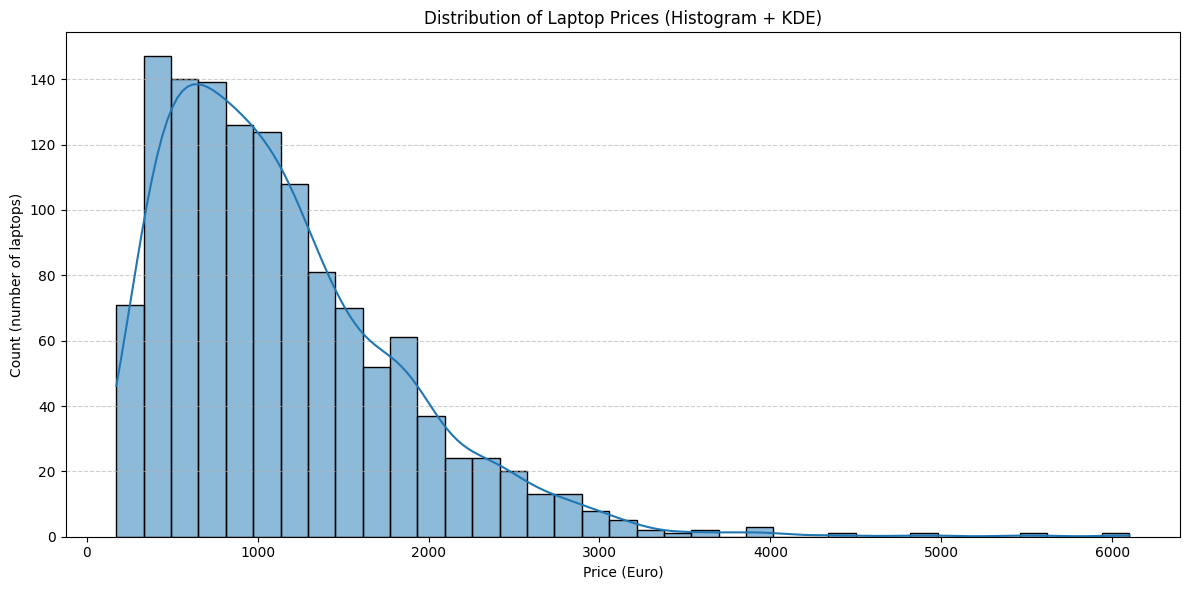

In [128]:
# --- Distribution of Laptop Prices (Histogram + KDE) using Seaborn ---
def all_prices(data):
    
    # Plot histogram + KDE (smooth trend line)
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x="Price (Euro)", bins="fd", kde=True)    # fd = Freedman–Diaconis rule

    # Add required titles and axis labels (including units)
    plt.title("Distribution of Laptop Prices (Histogram + KDE)")
    plt.xlabel("Price (Euro)")
    plt.ylabel("Count (number of laptops)")

    # Add a readable horizontal grid for counts
    plt.grid(axis="y", linestyle="--", alpha=0.6)

    plt.tight_layout()
    plt.show()

# Call the function
all_prices(df)

B. Which company has on average the most expensive laptop? What is the average laptop price for each company?

In [129]:
def avg_price_per_company_table(data):

    # Compute average price per company and return a DataFrame
    avg_table = (
        df.groupby("Company")["Price (Euro)"]
        .mean()
        .sort_values(ascending=False)
        .reset_index() # convert Series into DataFrame
        .rename(columns={"Price (Euro)": "Avg Price (Euro)"})
    )

    # Round (2 digits after dot) for readability
    avg_table["Avg Price (Euro)"] = avg_table["Avg Price (Euro)"].round(2)

    return avg_table

In [130]:
# Use the previous function

avg_table = avg_price_per_company_table(df)

# Print the top company and its average price
first_row = avg_table.iloc[0]  # first row by position
print("Most expensive company on average:", first_row["Company"])
print("Average price:", first_row["Avg Price (Euro)"])

# Display the table
display(avg_table)


Most expensive company on average: Razer
Average price: 3346.14


,Company,Avg Price (Euro)
0,Razer,3346.14
1,LG,2099.00
2,MSI,1728.91
3,Google,1677.67
4,Microsoft,1612.31
5,Apple,1564.20
6,Huawei,1424.00
7,Samsung,1413.44
8,Toshiba,1267.81
9,Dell,1199.23


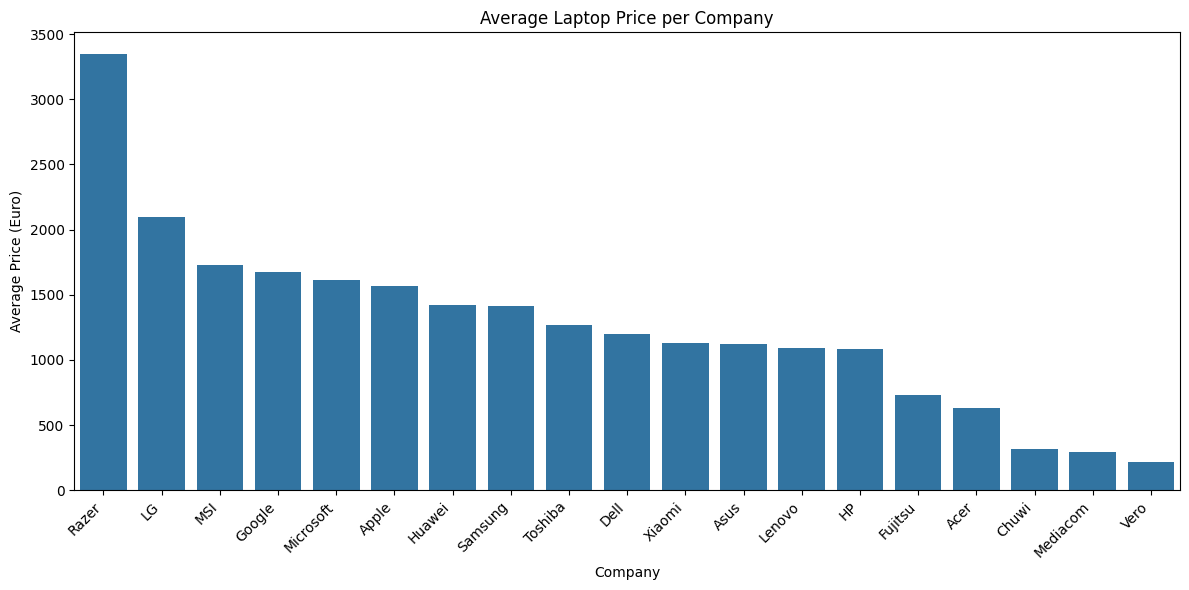

In [131]:
# --- Visual output ---

# Plot using the DataFrame columns (recommended Seaborn style)
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_company_df, x="Company", y="Avg Price (Euro)")

plt.title("Average Laptop Price per Company")
plt.xlabel("Company")
plt.ylabel("Average Price (Euro)")

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


C. Find the different types of Operating systems present in the data - under the column name "OpSys".

In [ ]:
# Show all unique OS values (old) 
print(df["OpSys"].unique())

# Show OS counts before cleaning
print("\nOperating Systems BEFORE unifying:")
print(df["OpSys"].value_counts())

def unite_opsys(data):
    
    # Work on a copy to avoid modifying the original DataFrame
    unified_df = data.copy()

    # Map known variants to unified names
    opsys_map = {
        "Mac OS X": "macOS",
        "Windows 7": "Windows",
        "Windows 10": "Windows",
        "Windows 10 S": "Windows",
    }

    # Apply the mapping (values not in the map remain unchanged)
    unified_df["OpSys"] = unified_df["OpSys"].replace(opsys_map)

    return unified_df

# Run the function 
df_united_os = unite_opsys(df)

print()
# Show all unique OS values (new) 
print(df_united_os["OpSys"].unique())
# Show OS counts after cleaning
print("\nOperating Systems AFTER unifying:")
print(df_united_os["OpSys"].value_counts())


['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']

Operating Systems BEFORE unifying:
OpSys
Windows 10      1048
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

['macOS' 'No OS' 'Windows' 'Linux' 'Android' 'Chrome OS']

Operating Systems AFTER unifying:
OpSys
Windows      1101
No OS          66
Linux          58
Chrome OS      27
macOS          21
Android         2
Name: count, dtype: int64


D. Plot for each of the operating system types the distribution of the prices, so that the number of plots equals to the number of unique operating systems.


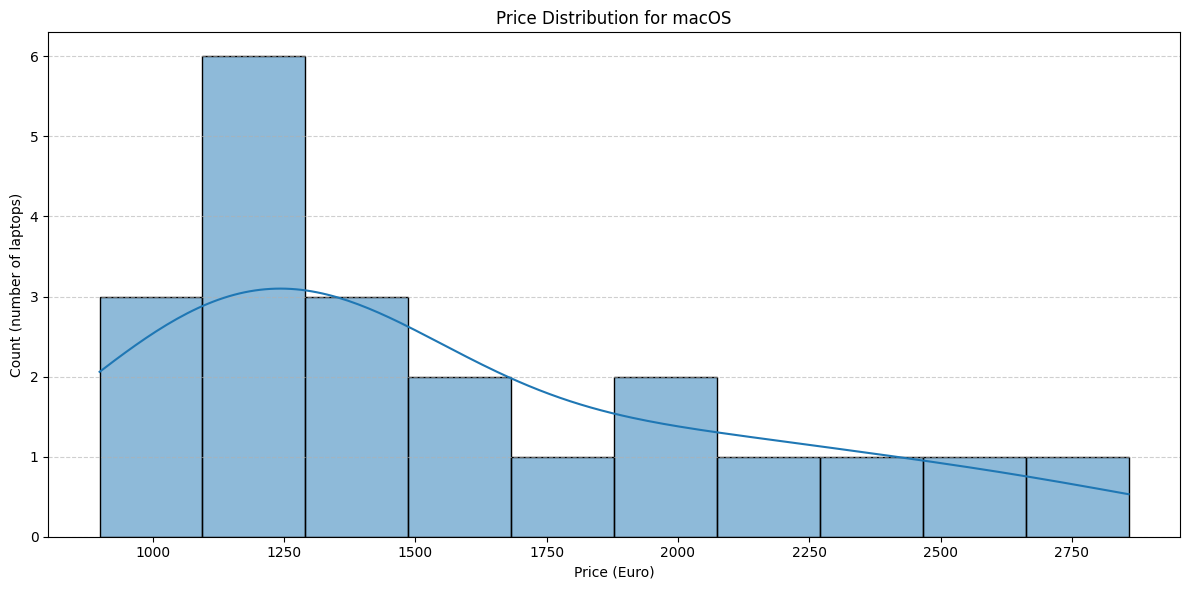

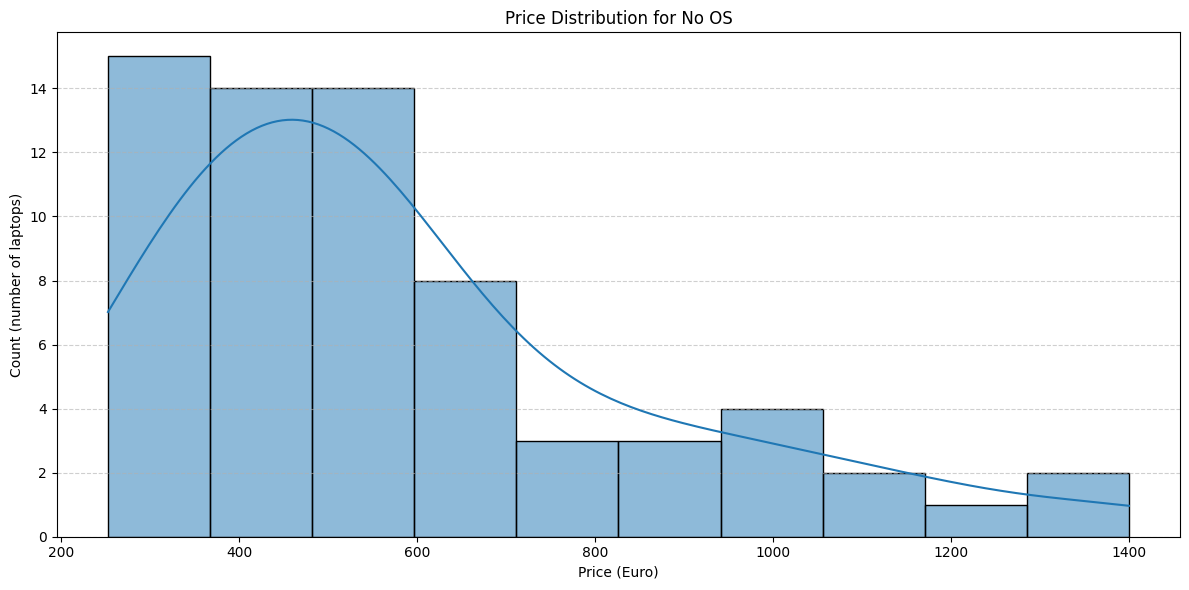

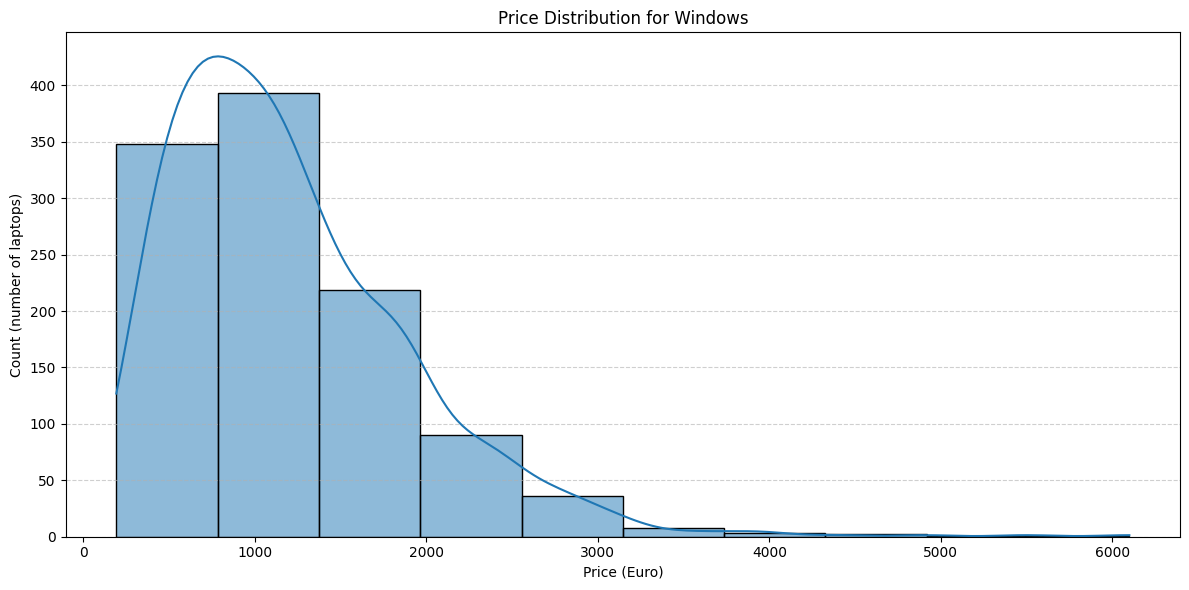

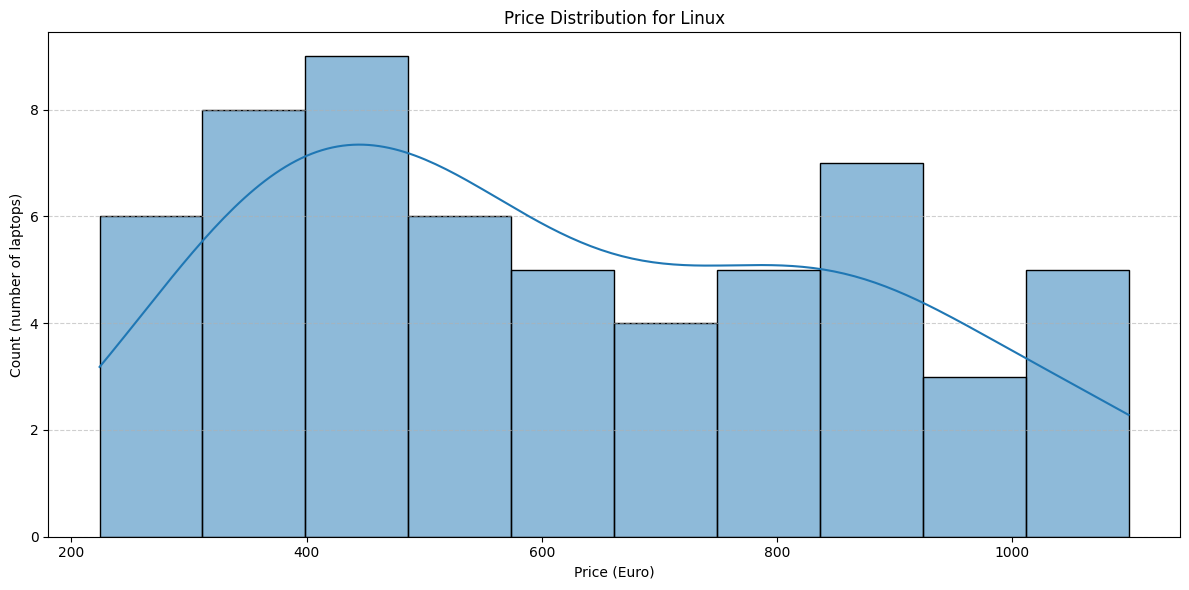

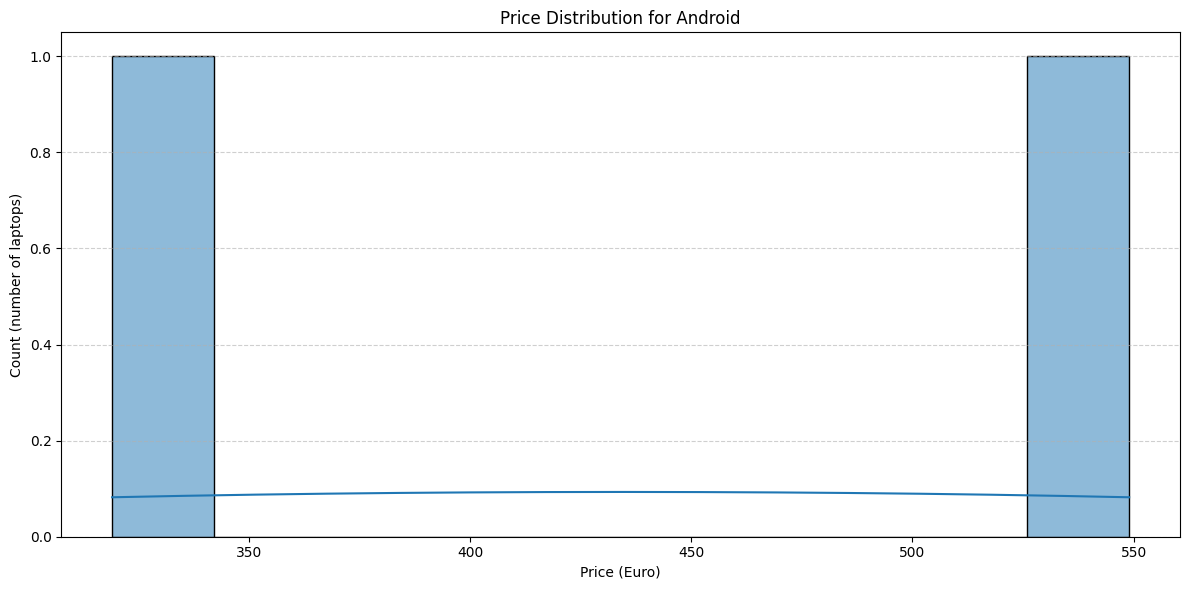

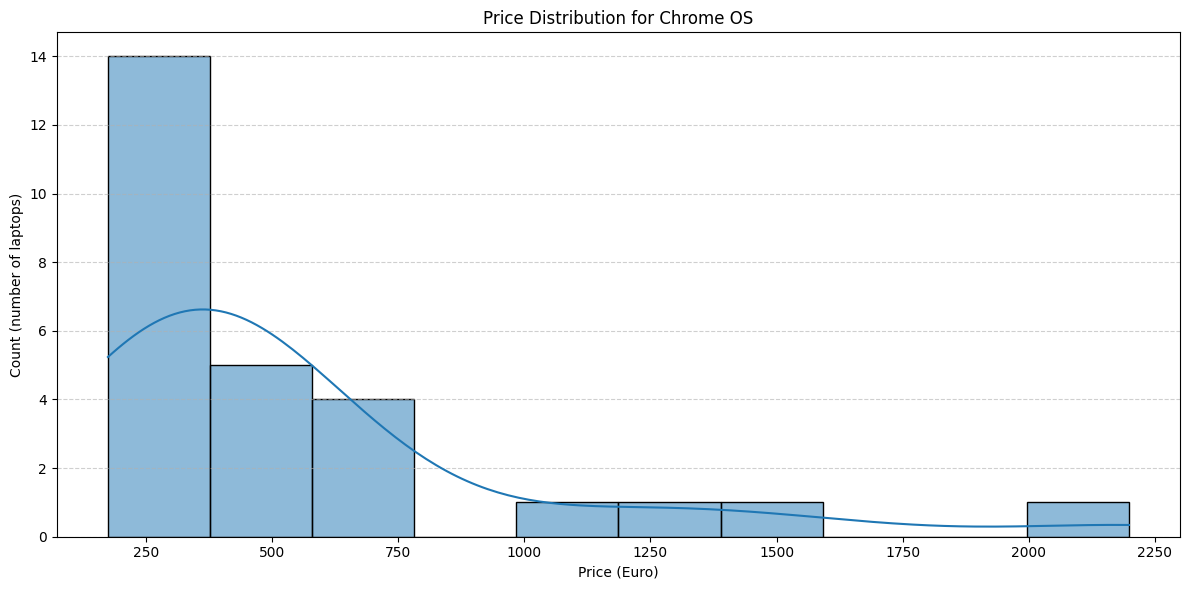

In [133]:
# Get the unique OS types after unifying 
opsys_types = df_united_os["OpSys"].unique()

# Create one plot per OS type 
for os_name in opsys_types:
    # Filter rows for the current OS
    os_df = df_united_os[df_united_os["OpSys"] == os_name]

    # Plot the distribution of prices for this OS
    plt.figure(figsize=(12, 6))
    sns.histplot(data=os_df, x="Price (Euro)", bins=10, kde=True)

    # Add required titles and axis labels (including units)
    plt.title(f"Price Distribution for {os_name}")
    plt.xlabel("Price (Euro)")
    plt.ylabel("Count (number of laptops)")

    # Add a readable grid for counts
    plt.grid(axis="y", linestyle="--", alpha=0.6)

    plt.tight_layout()
    plt.show()


E. What is the relationship between RAM and computer price? add an adequate plot to support your findings. 

<<< check data for outliers, what would be considered as an outlier? How will you detect it ? >>>

Rows before cleaning: 1275
Rows after cleaning: 1247
Pearson r (no outliers): 0.711
Spearman r (no outliers): 0.753


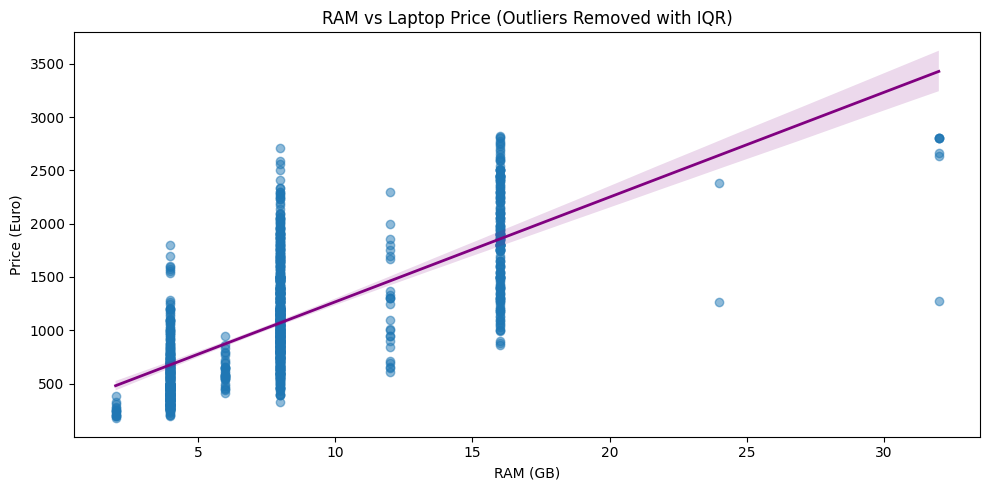

In [ ]:
def ram_vs_price(data): 
    # Analyze the relationship between RAM and price
    # Detect price outliers using the 1.5*IQR rule and plot a regression plot without the outliers
    
    # Work on a copy to avoid changing the original DataFrame
    df_rp = data.copy()

    # --- IQR outlier detection on Price ---
    q1 = df_rp["Price (Euro)"].quantile(0.25)
    q3 = df_rp["Price (Euro)"].quantile(0.75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    # Separate outliers and cleaned data
    outliers = df_rp[(df_rp["Price (Euro)"] < lower) | (df_rp["Price (Euro)"] > upper)]
    df_clean = df_rp[(df_rp["Price (Euro)"] >= lower) & (df_rp["Price (Euro)"] <= upper)]

    # Print number of rows  
    print(f"Rows before cleaning: {len(df_rp)}")
    print(f"Rows after cleaning: {len(df_clean)}")
          
          
    # --- Correlation (both pearson and spearman) ---
    pearson_r = df_clean["RAM (GB)"].corr(df_clean["Price (Euro)"], method="pearson")
    spearman_r = df_clean["RAM (GB)"].corr(df_clean["Price (Euro)"], method="spearman")

    print(f"Pearson r (no outliers): {pearson_r:.3f}")
    print(f"Spearman r (no outliers): {spearman_r:.3f}")

     # --- Plot ---
    plt.figure(figsize=(10, 5))
    sns.regplot(
        data=df_clean,
        x="RAM (GB)",
        y="Price (Euro)",
        scatter_kws={"alpha": 0.5},
        line_kws={"linewidth": 2, "color": "purple"}
    )

    plt.title("RAM vs Laptop Price (Outliers Removed with IQR)")
    plt.xlabel("RAM (GB)")
    plt.ylabel("Price (Euro)")
    plt.tight_layout()
    plt.show()

    return df_clean, outliers

# Run the function
df_no_outliers, price_outliers = ram_vs_price(df)

F. Create a new column for the dataframe called "Storage type" that extracts the storage type from the column "Memory".

In [148]:
def extract_storage_type(memory):
#  Reads the "Memory" text and returns only the storage type

    # Detect combined storage types first
    if "SSD" in memory and "HDD" in memory:
        return "SSD + HDD"
    # Detect single storage types
    elif "SSD" in memory:
        return "SSD"
    elif "HDD" in memory:
        return "HDD"
    elif "Hybrid" in memory:
        return "Hybrid"
    elif "eMMC" in memory:
        return "eMMC"
    elif "Flash Storage" in memory:
        return "Flash Storage"
    else:
        return "Unknown"

# Create the new column
df["Storage type"] = df["Memory"].apply(extract_storage_type)

# New column preview
df[["Memory", "Storage type"]]


,Memory,Storage type
0,128GB SSD,SSD
1,128GB Flash Storage,Flash Storage
2,256GB SSD,SSD
3,512GB SSD,SSD
4,256GB SSD,SSD
...,...,...
1270,128GB SSD,SSD
1271,512GB SSD,SSD
1272,64GB Flash Storage,Flash Storage
1273,1TB HDD,HDD
